In [1]:
import poseidon_core

In [2]:
file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'

min_x_extent = 847809.694
max_x_extent = 847973.874
min_y_extent = 127254.634
max_y_extent = 127450.141

grid_gen = poseidon_core.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent)

resolution = 0.05 # meters

pts_array = grid_gen.create_point_array(orig_units='meters')
grid_x, grid_y, grid_z_orig = grid_gen.gen_grid(resolution, z=pts_array)
# grid_z = grid_gen.gen_grid_pdal(resolution, orig_units='meters', interpolation_method='idw', radius=1.5)
grid_z_tin = grid_gen.gen_grid_pdal_tin_adaptive(resolution, orig_units='meters')

Directory to store grids created: data/generated_grids
Starting adaptive TIN grid generation...


TypeError: the JSON object must be str, bytes or bytearray, not dict

In [ ]:
import numpy as np

In [ ]:
print(np.nanmax(grid_z_orig))
print(np.nanmin(grid_z_orig))

print(np.nanmax(grid_z_tin))
print(np.nanmin(grid_z_tin))

2.089666666669162
-0.06643715848180667
2.0897941176467025
-0.06249004682546344


In [ ]:
elev_grid_tin = np.flipud(grid_z_tin)

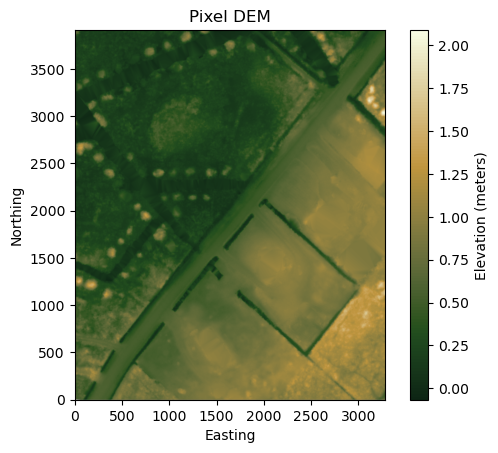

In [ ]:
poseidon_core.plotting_utils.plot_elev_grid(grid_z_orig)

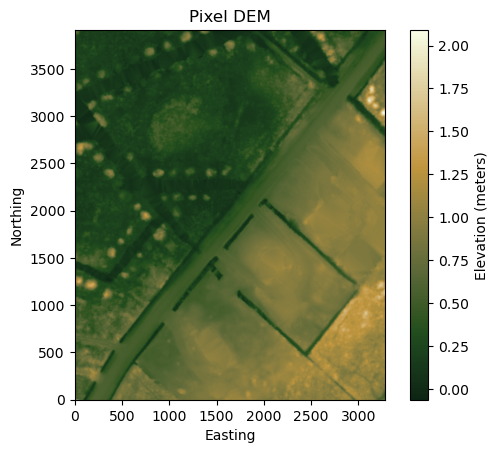

In [ ]:
poseidon_core.plotting_utils.plot_elev_grid(elev_grid_tin)

In [ ]:
nan_count = np.isnan(grid_z_orig).sum()
print(f"Number of NaNs: {nan_count}")

nan_count = np.isnan(grid_z_tin).sum()
print(f"Number of NaNs: {nan_count}")

Number of NaNs: 8834
Number of NaNs: 5077


In [ ]:
grid_z_orig = np.flipud(grid_z_orig)

In [ ]:
import cmocean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# (Your existing plot_elev_grid function would be here)
# ...

def compare_grids(grid_a, grid_b, name_a="Grid A (TIN)", name_b="Grid B (orig)"):
    """
    Provides a statistical and visual comparison between two elevation grids.
    
    Assumes grids are "raster-oriented" (top-down) and handles
    NaN values for all calculations and plots.
    
    Parameters:
    ----------
    grid_a : 2D np.ndarray
        The first grid to compare (e.g., from gen_grid_pdal_tin).
    grid_b : 2D np.ndarray
        The second grid to compare (e.g., from gen_grid_pdal 'idw').
    name_a : str
        Display name for the first grid.
    name_b : str
        Display name for the second grid.
    """
    
    # 1. Calculate Difference
    # We use np.nansum to handle cases where one grid has data and the other has NaN.
    # This isn't perfect, but for subtraction, it's safer than (grid_a - grid_b)
    # which would result in NaN if *either* is NaN.
    # A more robust way is to set NaNs to 0 for subtraction, then set back.
    # Let's do (grid_a - grid_b) and let np.nan... functions handle it.
    difference = grid_a - grid_b

    # 2. Print Statistical Summary
    print("--- Grid Comparison Statistics ---")
    print(f"Stats for: {name_a}")
    print(f"  Min: {np.nanmin(grid_a):.3f} m")
    print(f"  Max: {np.nanmax(grid_a):.3f} m")
    print(f"  Mean: {np.nanmean(grid_a):.3f} m")
    print(f"  Std Dev: {np.nanstd(grid_a):.3f} m")
    print("-" * 20)
    
    print(f"Stats for: {name_b}")
    print(f"  Min: {np.nanmin(grid_b):.3f} m")
    print(f"  Max: {np.nanmax(grid_b):.3f} m")
    print(f"  Mean: {np.nanmean(grid_b):.3f} m")
    print(f"  Std Dev: {np.nanstd(grid_b):.3f} m")
    print("-" * 20)
    
    print("Stats for: Difference (A - B)")
    print(f"  Min Diff: {np.nanmin(difference):.3f} m")
    print(f"  Max Diff: {np.nanmax(difference):.3f} m")
    print(f"  Mean Diff: {np.nanmean(difference):.3f} m")
    print(f"  Std Dev (Abs): {np.nanstd(np.abs(difference)):.3f} m")
    print("------------------------------------")

    
    # 3. Plot the Difference Grid
    
    # Flip it for correct plotting with origin='lower'
    plot_diff_grid = np.flipud(difference)
    
    # Get the diverging colormap 'balance' or 'diff' from cmocean
    cmap = cmocean.cm.balance 
    
    # Find the maximum absolute difference to center the colormap at 0
    max_abs_diff = np.nanmax(np.abs(plot_diff_grid))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(
        plot_diff_grid, 
        origin="lower", 
        cmap=cmap,
        vmin=-max_abs_diff,  # Center colormap at 0
        vmax=max_abs_diff
    )
    plt.colorbar(label=f"Elevation Difference (m)\n({name_a} - {name_b})")
    plt.title("Difference Grid")
    plt.xlabel("Easting")
    plt.ylabel("Northing")
    plt.show()

    
    # 4. Plot Histograms 📊
    plt.figure(figsize=(12, 6))
    
    # Filter NaNs for histogram plotting
    hist_a = grid_a[~np.isnan(grid_a)]
    hist_b = grid_b[~np.isnan(grid_b)]
    
    plt.hist(hist_a, bins=100, alpha=0.7, label=name_a, density=True)
    plt.hist(hist_b, bins=100, alpha=0.7, label=name_b, density=True)
    plt.title("Elevation Distribution")
    plt.xlabel("Elevation (m)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

--- Grid Comparison Statistics ---
Stats for: PDAL-TIN
  Min: -0.062 m
  Max: 2.090 m
  Mean: 0.561 m
  Std Dev: 0.344 m
--------------------
Stats for: ORIG. METHOD
  Min: -0.066 m
  Max: 2.090 m
  Mean: 0.561 m
  Std Dev: 0.344 m
--------------------
Stats for: Difference (A - B)
  Min Diff: -0.494 m
  Max Diff: 0.442 m
  Mean Diff: -0.000 m
  Std Dev (Abs): 0.005 m
------------------------------------


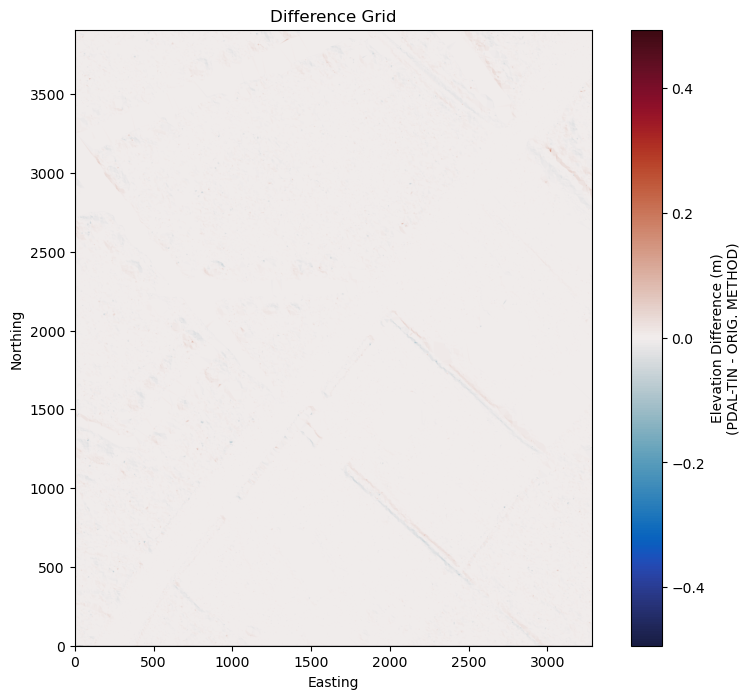

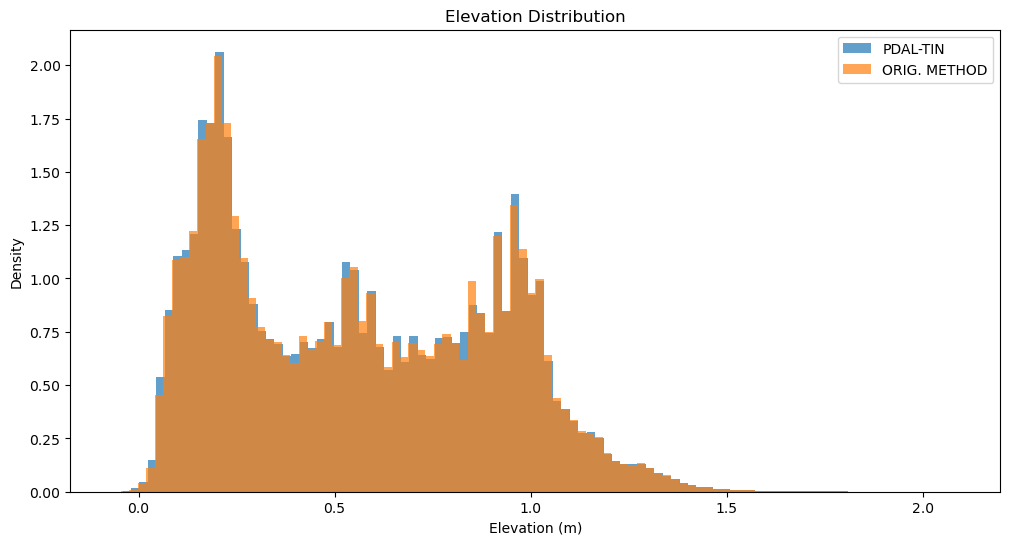

In [ ]:
compare_grids(grid_z_tin, grid_z_orig, name_a="PDAL-TIN", name_b="ORIG. METHOD")